In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Heart_Attack_Dataset/heart.csv")
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

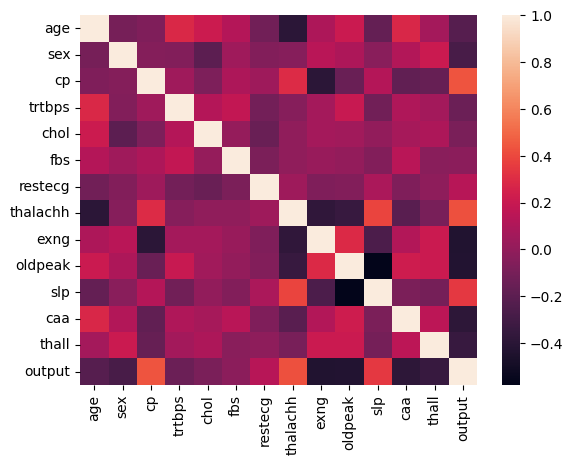

In [ ]:
sns.heatmap(data.corr()) # corr - co relation

<Axes: >

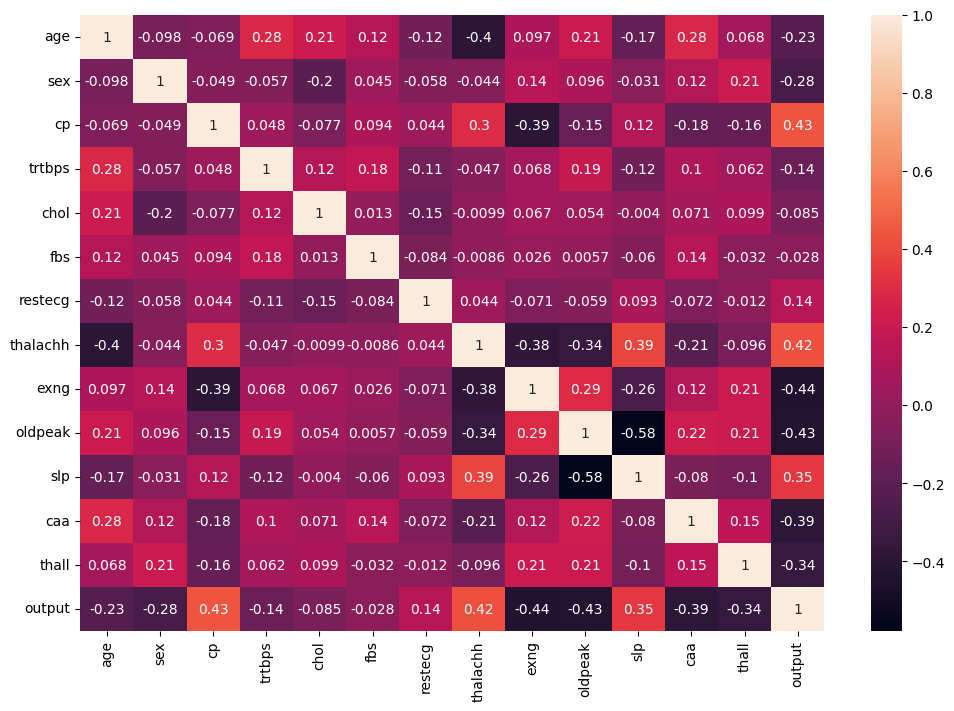

In [ ]:
flx,axs=plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True) # corr - co relation

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('output',axis=1)
Y=data['output']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [ ]:
xnewtrain,xvalid,ynewtrain,yvalid=train_test_split(xtrain,ytrain)

In [ ]:
from keras import Sequential
from keras.layers import Dense
xnewtrain.shape[1]

13

In [ ]:
model=Sequential()
model.add(Dense(20, activation='relu', input_dim=xtrain.shape[1])) # input layer
model.add(Dense(100, activation='relu')) # hidden layer 1
model.add(Dense(100, activation='relu')) # hidden layer 2
model.add(Dense(1, activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12581 (49.14 KB)
Trainable params: 12581 (49.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''
0s
model.summary()
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 dense (Dense)               (None, 20)                280       (13 * 20 (i/pLayer neurons * next layer neurons) + 1*20 (bias))

 dense_1 (Dense)             (None, 100)               2100      (100 * 20 + 1*100)

 dense_2 (Dense)             (None, 100)               10100

 dense_3 (Dense)             (None, 1)                 101

=================================================================
Total params: 12581 (49.14 KB)
Trainable params: 12581 (49.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
'''

'\n0s\nmodel.summary()\nModel: "sequential"\n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n dense (Dense)               (None, 20)                280       (13 * 20 (i/pLayer neurons * next layer neurons) + 1*20 (bias))\n                                                                 \n dense_1 (Dense)             (None, 100)               2100      (100 * 20 + 1*100)\n                                                                 \n dense_2 (Dense)             (None, 100)               10100     \n                                                                 \n dense_3 (Dense)             (None, 1)                 101       \n                                                                 \n=================================================================\nTotal params: 12581 (49.14 KB)\nTrainable params: 12581 (49.14 KB)\nNo

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist=model.fit(xnewtrain,ynewtrain, epochs=100, validation_data=(xvalid, yvalid), batch_size=32)

Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 0.8685 - accuracy: 0.6941 - val_loss: 0.8928 - val_accuracy: 0.7368
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6053 - accuracy: 0.7765 - val_loss: 0.5897 - val_accuracy: 0.7193
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5987 - accuracy: 0.7824 - val_loss: 0.6318 - val_accuracy: 0.7895
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4859 - accuracy: 0.7824 - val_loss: 0.4524 - val_accuracy: 0.7895
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3522 - accuracy: 0.8471 - val_loss: 0.6160 - val_accuracy: 0.7719
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3840 - accuracy: 0.8059 - val_loss: 0.3997 - val_accuracy: 0.8070
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3279 - accuracy: 0.8529 - val_loss: 0.4691 - val_accuracy: 0.8070
Epoch 8/100
6/6 [=====

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

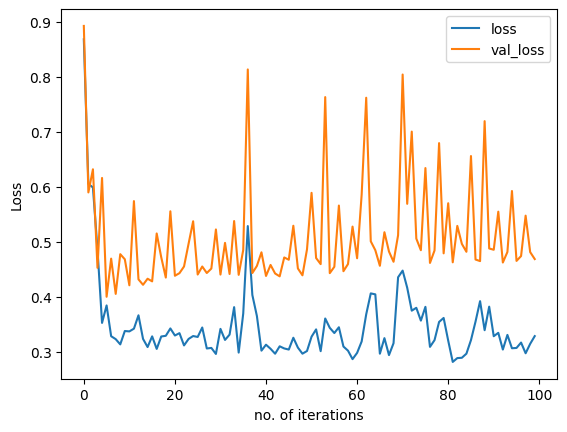

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('no. of iterations')
plt.ylabel("Loss")
plt.legend()

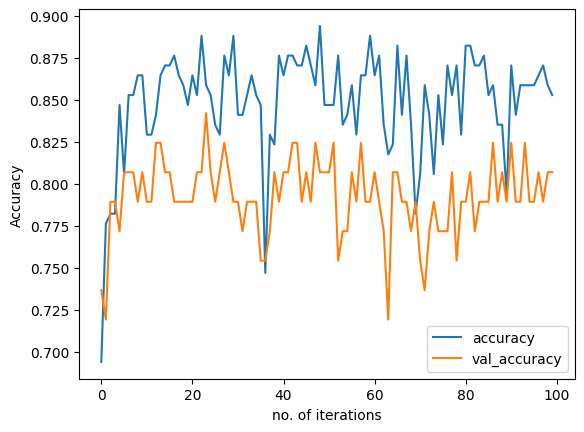

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('no. of iterations')
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
ypred=model.predict(xtest)

3/3 [==============================] - 0s 10ms/step


In [ ]:
pred=np.round(ypred)
pred=np.asarray(pred, dtype='int')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ytest,pred)

0.7763157894736842

<Axes: >

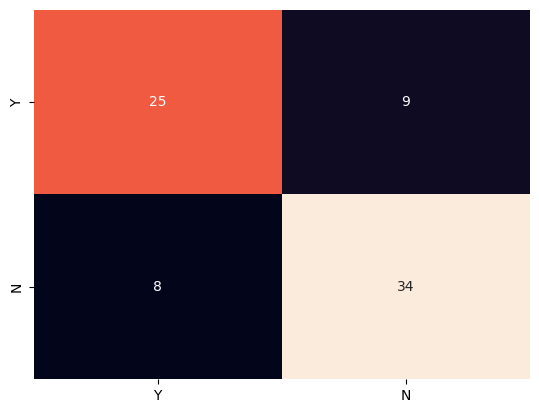

In [ ]:
sns.heatmap(confusion_matrix(ytest,pred), annot=True, cbar=False, xticklabels=['Y','N'], yticklabels=['Y','N'])